<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Deni-branch/cleanedfer13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import shutil
shutil.rmtree('/tmp/dataset')
shutil.rmtree('/tmp/dataset2')

In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/cleanedfer2013.zip')
zipref.extractall('/tmp/dataset')

In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/faceexp.zip')
zipref.extractall('/tmp/dataset2')

In [ ]:
import tensorflow as tf

In [ ]:
# dataset kepisah
traindir = ('/tmp/dataset')
traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,  validation_split=0.2)
train_generator = traindatagen.flow_from_directory(traindir, target_size=(150,150), class_mode='categorical', batch_size=32, subset='training')
test_generator = traindatagen.flow_from_directory(traindir, target_size=(150,150), class_mode='categorical', batch_size=32, subset='validation')

#testdir = ('/tmp/dataset2/images/images/validation')
#testdatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
#test_generator = testdatagen.flow_from_directory(testdir, target_size=(150,150), class_mode='categorical', batch_size=32)


Found 13502 images belonging to 5 classes.
Found 3374 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),         
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])

#model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['acc'])
history= model.fit(train_generator, validation_data=test_generator,epochs=10)

Epoch 1/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8720 - acc: 0.6575 - val_loss: 0.8905 - val_acc: 0.6621
Epoch 2/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8549 - acc: 0.6667 - val_loss: 1.2260 - val_acc: 0.5777
Epoch 3/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8399 - acc: 0.6699 - val_loss: 0.8860 - val_acc: 0.6731
Epoch 4/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8337 - acc: 0.6752 - val_loss: 0.8601 - val_acc: 0.6971
Epoch 5/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8278 - acc: 0.6795 - val_loss: 0.8454 - val_acc: 0.6755
Epoch 6/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8075 - acc: 0.6806 - val_loss: 0.8491 - val_acc: 0.6752
Epoch 7/10
422/422 [==============================] - 19s 45ms/step - loss: 0.8051 - acc: 0.6823 - val_loss: 0.9599 - val_acc: 0.6117
Epoch 8/10
422/422 [==============================] - 19s 45ms

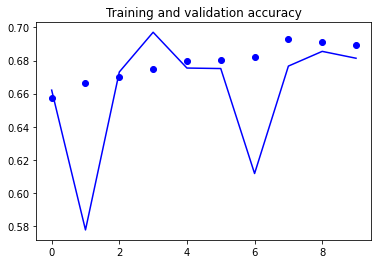

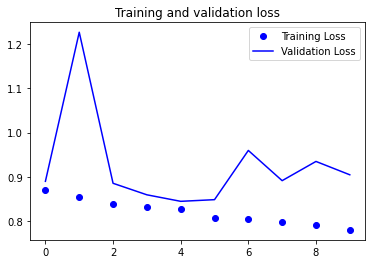

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

In [ ]:
#tf.keras.backend.clear_session()

NameError: ignored